### Named Entity Recognition (NER)

**Named Entity Recognition (NER)** is a subtask of Natural Language Processing (NLP) focused on identifying and classifying key information (entities) in text into predefined categories.

NER is typically a **supervised learning task**. That means, it requires labeled training data, where each word/token in a sentence is annotated with its correct entity label (e.g., PERSON, ORG, O for "outside any entity").

Models learn from these examples to generalize to new, unseen text.

There are unsupervised or semi-supervised approaches to NER, especially when labeled data is scarce:
- Clustering-based methods (e.g., grouping words that behave like named entities)
- Bootstrapping with seed rules
- Pretrained large language models fine-tuned on small labeled sets (semi-supervised or few-shot learning)

However, these tend to be less accurate or need extra domain-specific tuning.

---

### Tagging schemes
- IOB or BIO
- BILOU (Begin, Inside, Last, Outside, Unit) — finer-grained
- IO (only Inside/Outside — less informative)

**What is IOB Tagging?**
IOB stands for:
- B : Beginning of a named entity
- I : Inside a named entity (but not the first word)
- O : Outside any named entity

This tagging format is used to label sequences of words in NER tasks.

**Eg:**

Sentence: "Steve Jobs founded Apple in California."
```
IOB Tags:
---------
Steve       B-PER
Jobs        I-PER
founded     O
Apple       B-ORG
in          O
California  B-LOC
.           O
```
This helps distinguish between:
- A single-word entity (B-)
- A multi-word entity (B-, followed by one or more I-)
- Non-entities (O)

Example of Labeled Data:(BIO)
---
"Barack Obama was born in Hawaii."
→ [("Barack", B-PER), ("Obama", I-PER), ("was", O), ("born", O), ("in", O), ("Hawaii", B-LOC)]

**What NER Does:**

Given a sentence, NER extracts entities like:
- Persons: e.g., "Barack Obama"
- Organizations: e.g., "Google", "United Nations"
- Locations: e.g., "Germany", "New York"
- Dates/Times: e.g., "January 1", "5 PM"
- Monetary values: e.g., "$100", "20 euros"
- Percentages: e.g., "15% growth"
- Other domain-specific types (in medical, legal, financial texts, etc.)

### Eg:

**Input**:
> "Apple Inc. was founded by Steve Jobs in Cupertino, California."

**NER Output**:
- `Apple Inc.` → B-ORG  
- `Steve Jobs` → B-Person  
- `Cupertino` → B-Location  
- `California` → B-Location  

---

### How NER Works

NER typically involves:
- **Tokenization**: Splitting text into words.
- **Part-of-speech tagging**: Labeling word types (noun, verb, etc.).
- **Entity tagging**: Using models (rule-based or ML) to assign entity types.

---

### Techniques Used in NER:

1. **Rule-based approaches**:
   - Use hand-crafted rules (regex, grammar patterns).
   - High precision, low flexibility.

2. **Statistical/Machine Learning models**:
   - CRFs (Conditional Random Fields)
   - HMMs (Hidden Markov Models)

3. **Deep Learning approaches**:
   - BiLSTM + CRF
   - Transformers (e.g., BERT, RoBERTa with fine-tuning)

---

### Evaluation
NER is evaluated using:
- Precision (How many predicted entities are correct?)
- Recall (How many actual entities were found?)
- F1-score (Harmonic mean of precision and recall)

### Ambiguity and errors:
NER often struggles with:
- Ambiguous words (e.g., "Jordan" — person or country)
- Nested entities (e.g., "University of California, Berkeley")

---

### Libraries for NER:

- `spaCy` (very fast, production-ready)
- `NLTK` (educational, limited NER)
- `Stanford NER` (Java-based)
- `Hugging Face Transformers` (for transformer-based models)
- `Flair`, `AllenNLP`, `Stanza` (research-grade tools)



### Use Cases:

- Information extraction (from news, contracts, resumes)
- Chatbots and virtual assistants
- Search engines and recommendation systems
- Finance, legal, and medical document analysis



**Notes on HMM and CRF:**

Great question! Both **CRF (Conditional Random Fields)** and **HMM (Hidden Markov Models)** are classical machine learning models used for sequence labeling tasks like **Named Entity Recognition (NER)**. Here's what they are and how they relate to NER:

---

## 🔍 Hidden Markov Model (HMM) for NER

### What it is:
An HMM is a **generative probabilistic model** that assumes:
- There's a sequence of **hidden states** (e.g., entity tags like `B-PER`, `I-PER`, `O`),
- And a sequence of **observations** (e.g., words in the sentence),
- The model learns **transition probabilities** between tags and **emission probabilities** of words given tags.

### How it works in NER:
- Tries to **predict the most likely sequence of tags** for a given sentence.
- Based on probabilities learned from labeled data.

### Limitations:
- Assumes each tag depends **only on the previous tag** (first-order Markov assumption).
- Doesn't handle **non-independent features** well (e.g., word shape, POS tags, word embeddings).

---

## Conditional Random Fields (CRF) for NER

### What it is:
A **discriminative probabilistic model** that directly models the **conditional probability** of a tag sequence given an input sequence (e.g., words in a sentence). Unlike HMMs, CRFs:

- Allow **arbitrary features** about the input (e.g., word itself, POS tag, word shape, etc.)
- Model **dependencies between output tags** jointly (rather than independently).

Why it's better than HMM for NER:
- Can use **rich features** (word context, capitalization, prefixes, suffixes).
- More **accurate** for tasks like NER.
- Doesn't assume independence between input features.

---

### CRF in Modern NER

CRFs are often used as the **final layer** on top of BiLSTM or transformer encoders like this:

```text
Word Embeddings → BiLSTM → CRF → Named Entity Tags
```

This setup helps ensure the model outputs **valid tag sequences** (e.g., `I-PER` always follows `B-PER`).

---

## Summary Comparison

| Model | Type         | Pros                        | Cons                            |
|-------|--------------|-----------------------------|----------------------------------|
| HMM   | Generative   | Simple, interpretable       | Weak with complex dependencies  |
| CRF   | Discriminative | Accurate, flexible features | Slower, more complex to train   |

---

`sklearn-crfsuite` or `Hugging Face + CRF` to be used

## Dataset

The shared task of CoNLL-2002 (https://www.clips.uantwerpen.be/conll2002/ner/) concerns language-independent named entity recognition. We will concentrate on four types of named entities: persons, locations, organizations and names of miscellaneous entities that do not belong to the previous three groups.

The data consists of two columns separated by a single space. Each word has been put on a separate line and there is an empty line after each sentence. The first item on each line is a word and the second the named entity tag. The tags have the same format as in the chunking task: a B denotes the first item of a phrase and an I any non-initial word. There are four types of phrases: person names (PER), organizations (ORG), locations (LOC) and miscellaneous names (MISC).

In [1]:
import torch
import torch.nn as nn

import nltk
nltk.download("conll2002")

import numpy as np
from time import time

[nltk_data] Downloading package conll2002 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2002.zip.


In [2]:
corpus = nltk.corpus.conll2002.iob_sents()

In [3]:
len(corpus) # list(sentences) - where each sentence is certain format

35651

In [4]:
corpus[0]  # first sentence - [(w1, POS, IOBEntityTag)]

[('Sao', 'NC', 'B-LOC'),
 ('Paulo', 'VMI', 'I-LOC'),
 ('(', 'Fpa', 'O'),
 ('Brasil', 'NC', 'B-LOC'),
 (')', 'Fpt', 'O'),
 (',', 'Fc', 'O'),
 ('23', 'Z', 'O'),
 ('may', 'NC', 'O'),
 ('(', 'Fpa', 'O'),
 ('EFECOM', 'NP', 'B-ORG'),
 (')', 'Fpt', 'O'),
 ('.', 'Fp', 'O')]

# Prepare Data

Goal: We are doing window classification to predict entities. Input (target center word + window ctxwords). So, a single input will have window number of context words on either side of target word along with target word, and we predict the entity tag for this target word based on its context and supervised signal label.

### 1. Tokenization is already done. So, we skip tokenization

# 2. Get the sentences and tags, ignoring pos from the corpus

In [5]:
# Example
list(zip(*corpus[0]))

[('Sao',
  'Paulo',
  '(',
  'Brasil',
  ')',
  ',',
  '23',
  'may',
  '(',
  'EFECOM',
  ')',
  '.'),
 ('NC', 'VMI', 'Fpa', 'NC', 'Fpt', 'Fc', 'Z', 'NC', 'Fpa', 'NP', 'Fpt', 'Fp'),
 ('B-LOC', 'I-LOC', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'O', 'O')]

In [6]:
list(zip(*corpus[0]))[0]

('Sao', 'Paulo', '(', 'Brasil', ')', ',', '23', 'may', '(', 'EFECOM', ')', '.')

In [7]:
list(zip(*corpus[0]))[2]

('B-LOC', 'I-LOC', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'O', 'O')

In [8]:
# Prepare data
data = []
for sent in corpus:
    words, _, entity_tags = list(zip(*sent))
    data.append([words, entity_tags])

In [9]:
len(data), type(data[0]), type(data[0][0]), type(data[0][1]), data[0][0], data[0][1]

(35651,
 list,
 tuple,
 tuple,
 ('Sao',
  'Paulo',
  '(',
  'Brasil',
  ')',
  ',',
  '23',
  'may',
  '(',
  'EFECOM',
  ')',
  '.'),
 ('B-LOC', 'I-LOC', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'O', 'O'))

In [10]:
# Example: Unpacks sents and tags
sents, entity_tags = list(zip(*data))
len(sents), len(entity_tags)

(35651, 35651)

In [11]:
sents[0], entity_tags[0]

(('Sao',
  'Paulo',
  '(',
  'Brasil',
  ')',
  ',',
  '23',
  'may',
  '(',
  'EFECOM',
  ')',
  '.'),
 ('B-LOC', 'I-LOC', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'O', 'O'))

# 3. Create Vocab and distinct tags and dictionaries

In [12]:
# Flatten
flatten = lambda sents: [word for sent in sents for word in sent]

# Unpacks sents and tags
sents, entity_tags = list(zip(*data))

# Generate
vocab = list(set(flatten(sents)))
tags = list(set(flatten(entity_tags)))

In [13]:
len(vocab), len(tags)

(65459, 9)

In [14]:
tags

['B-PER', 'I-LOC', 'I-ORG', 'B-MISC', 'I-MISC', 'B-ORG', 'I-PER', 'B-LOC', 'O']

`<unk>` is for words that doesnt exist in vocab. `<pad>` token is to make sure we have same sequence length throughout,, specially when we are handling the starting word or ending word of a sentence/sequence. There will be no words before starting word and after ending word and hence window size will be less and uneven. In such cases, we use `<pad>` token to make sure that we have equal window size throughout

In [15]:
# add <unk> and <pad> token for vocab. pad token is for start or end of sentence, like padding
word2idx = {"<UNK>": 0, "<PAD>": 1}  # len(word2idx) = 2
for word in vocab:
    if word2idx.get(word) is None:
        word2idx[word] = len(word2idx)
idx2word = {v: k for k, v in word2idx.items()}


# Similary create dict for tags
tag2idx = {}  # len(tag2idx) = 0
for tag in tags:
    if tag2idx.get(tag) is None:
        tag2idx[tag] = len(tag2idx)
idx2tag = {v: k for k, v in tag2idx.items()}

In [16]:
len(word2idx), len(tag2idx)

(65461, 9)

In [17]:
tag2idx

{'B-PER': 0,
 'I-LOC': 1,
 'I-ORG': 2,
 'B-MISC': 3,
 'I-MISC': 4,
 'B-ORG': 5,
 'I-PER': 6,
 'B-LOC': 7,
 'O': 8}

### 4. Prepare Window Data - Generate Window based inputs and respective outputs - and then Train, Test Data from it

In [18]:
# Example
windows = []
window_size = 2 # so we get 5 words in each input -, -, target, -, - => window_size*2 + 1 words

for sample in data:
    sent = sample[0]
    tags = sample[1]
    # Padding
    padding = ["<PAD>"] * window_size
    padded_sent = padding + list(sent) + padding
    print(padded_sent)
    # Generate windows
    window = list(nltk.ngrams(sequence=padded_sent, n=window_size * 2 + 1))
    print(window)

    # Given a window of five words, predict the tag of the middle word
    windows.extend([[list(window[i]), tags[i]] for i in range(len(sent))])  # i is nothing but center word in window here
    print(windows)
    break

['<PAD>', '<PAD>', 'Sao', 'Paulo', '(', 'Brasil', ')', ',', '23', 'may', '(', 'EFECOM', ')', '.', '<PAD>', '<PAD>']
[('<PAD>', '<PAD>', 'Sao', 'Paulo', '('), ('<PAD>', 'Sao', 'Paulo', '(', 'Brasil'), ('Sao', 'Paulo', '(', 'Brasil', ')'), ('Paulo', '(', 'Brasil', ')', ','), ('(', 'Brasil', ')', ',', '23'), ('Brasil', ')', ',', '23', 'may'), (')', ',', '23', 'may', '('), (',', '23', 'may', '(', 'EFECOM'), ('23', 'may', '(', 'EFECOM', ')'), ('may', '(', 'EFECOM', ')', '.'), ('(', 'EFECOM', ')', '.', '<PAD>'), ('EFECOM', ')', '.', '<PAD>', '<PAD>')]
[[['<PAD>', '<PAD>', 'Sao', 'Paulo', '('], 'B-LOC'], [['<PAD>', 'Sao', 'Paulo', '(', 'Brasil'], 'I-LOC'], [['Sao', 'Paulo', '(', 'Brasil', ')'], 'O'], [['Paulo', '(', 'Brasil', ')', ','], 'B-LOC'], [['(', 'Brasil', ')', ',', '23'], 'O'], [['Brasil', ')', ',', '23', 'may'], 'O'], [[')', ',', '23', 'may', '('], 'O'], [[',', '23', 'may', '(', 'EFECOM'], 'O'], [['23', 'may', '(', 'EFECOM', ')'], 'O'], [['may', '(', 'EFECOM', ')', '.'], 'B-ORG'], [[

In [19]:
# Example
windows = []
window_size = 2 # so we get 5 words in each input -, -, target, -, - => window_size*2 + 1 words

for sample in data:
    sent = sample[0]
    tags = sample[1]
    # Padding
    padding = ["<PAD>"] * window_size
    padded_sent = padding + list(sent) + padding

    # Generate windows
    window = list(nltk.ngrams(sequence=padded_sent, n=window_size * 2 + 1))
    # Given a window of five words, predict the tag of the middle word
    windows.extend([[list(window[i]), tags[i]] for i in range(len(sent))])  # i is nothing but center word in window here

In [20]:
len(windows)

678377

In [21]:
# Generate train and test data
import random
random.shuffle(windows)

train_data = windows[:int(len(windows) * 0.9)]
test_data = windows[int(len(windows) * 0.9):]

### 5. Model

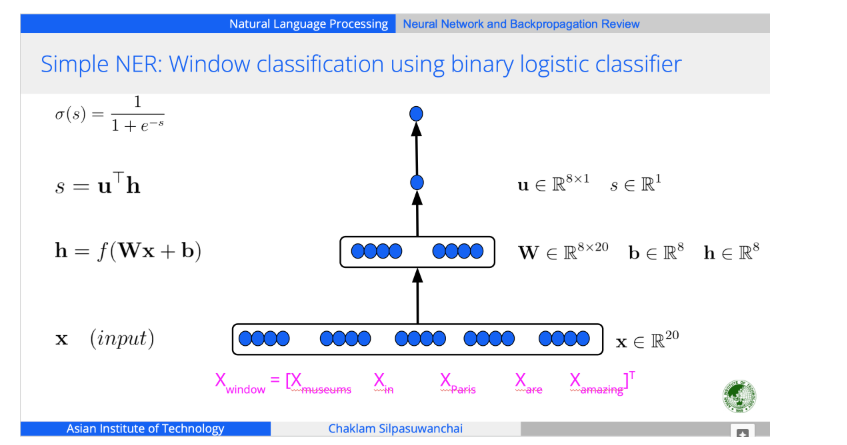

SimpleNER takes
- input (window sized ctx words with target word entity)
- Numericalize, generate random embeddings for input
- Send them to Linear Layer
- Non-linear Activation
- Another Linear Layer
- Target is the entity tag of center word
- Sigmoid if its binary logistic regression problem of detecting single entity yes or no
- Softmax if its multinomial logistic regression problem of detecting likelihood of multiple enitites

In our problem, our learning problem is to detect whether our target word belongs to any of the existing ner tags. So, we use softmax and more deeper layer


In [22]:
import torch
from torch import nn as nn

class NERWindowClassifier(nn.Module):
    def __init__(self, voc_size, embed_size, window_size, hidden_size, output_size) -> None:
        super(NERWindowClassifier, self).__init__()
        self.embedding = nn.Embedding(voc_size, embed_size)
        self.h_linear_0 = nn.Linear(embed_size * (window_size*2 + 1), hidden_size)  # inp- (window_size*2+1) * embed_dim, out - hidden_dim
        self.h_linear_1 = nn.Linear(hidden_size, hidden_size)                       # inp- hidden_dim, out - hidden_dim
        self.out_layer =  nn.Linear(hidden_size, output_size)                       # inp - hidden_dim, out = out_dim => len(tag2idx)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.3)
        # Note: torch applies softmax already in the cross entropy loss function

    def forward(self, inputs):
        """
        inputs: bs, (window_size*2+1)
        """
        embeds = self.embedding(inputs)                                      # bs, (window_size*2+1), embed_dim  Eg: (bs, 5, emb_dim) for winsize=2
        concatenated = embeds.view(-1, embeds.size(1) * embeds.size(2))      # bs, (window_size*2+1) * embed_dim
        h0 = self.relu(self.h_linear_0(concatenated))                        # bs, hid_dim
        h0 = self.dropout(h0)                                                # bs, hid_dim
        h1 = self.relu(self.h_linear_1(h0))                                  # bs, hid_dim
        h1 = self.dropout(h1)                                                # bs, hid_dim
        logits = self.out_layer(h1)                                          # bs, out_dim
        return logits

In [23]:
# Test the function
import numpy as np

model = NERWindowClassifier(voc_size=7, embed_size=3, window_size=2, hidden_size=4, output_size=5)
input = torch.LongTensor(np.random.randint(0, 7, (2, 5)))
print(input.shape)
logits = model(input)

torch.Size([2, 5])


### 6. Training

In [24]:
# Batch generation
import random
def get_batch(batch_size, train_data):
    for idx in range(0, len(train_data), batch_size):
        end_idx = min(idx + batch_size, len(train_data))  # min() ensures the last batch doesn't go out of bounds. Automatically handles the final smaller batch (if len(train_data) % batch_size != 0)
        yield train_data[idx : end_idx]

In [25]:
def prepare_sequence(seq, word2idx):
    idxs = list(map(lambda w: word2idx[w] if word2idx.get(w) is not None else word2idx["<UNK>"] , seq))
    return torch.LongTensor(idxs)

def prepare_tag(tag, tag2idx):
    return torch.LongTensor([tag2idx[tag]])

In [38]:
# Training
embed_dim = 4   # x (WINDOW_SIZE*2+1) = 20  # increasing this will increase the f1score
window_size = 2
voc_size = len(word2idx)
output_dim = len(tag2idx)
hidden_dim = 8  # #increasing this will increase the f1score

epochs = 5
batch_size = 4
random.shuffle(train_data)


model = NERWindowClassifier(voc_size, embed_dim, window_size, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

model.train()  # we have dropout layers, so we need to keep the model in train mode
for epoch in range(epochs):
    random.shuffle(train_data)
    total_loss = []
    for i, batch in enumerate(get_batch(batch_size, train_data)):
        optimizer.zero_grad()
        X, y = list(zip(*batch))
        #x: (['leerde', 'Luis', 'Barragán', 'door', 'die'], [another batch], ..)
        #y: ('I-PER', 'B-LOC', ..)
        X_train  = torch.cat([prepare_sequence(sent, word2idx).view(1, -1) for sent in X])  # (bs, window_size*2+1)
        Y_train = torch.cat([prepare_tag(tag, tag2idx) for tag in y])                       # (bs,)
        Y_pred = model(X_train)                                                             # (bs, window_size*2+1) -> logits (bs, out_dim)
        loss = criterion(Y_pred, Y_train)
        total_loss.append(loss.item())
        loss.backward()
        optimizer.step()

    print(f"Epoch: {epoch + 1} | Loss: {np.mean(total_loss):.6f} ")


Epoch: 1 | Loss: 0.464117 
Epoch: 2 | Loss: 0.368304 
Epoch: 3 | Loss: 0.338171 
Epoch: 4 | Loss: 0.321482 
Epoch: 5 | Loss: 0.311281 


### Test

In [39]:
len(test_data), len(train_data)

(67838, 610539)

In [40]:
# calculate f1-score and accuracy
accuracy = 0
for_f1_score = []

model.eval()
for test in test_data:
    x, y = test[0], test[1]
    x_test_ = prepare_sequence(x, word2idx).view(1, -1)   # x_test _: (1, window_size * 2 + 1)  # we ll use the context for inference as well..
    # x_test_ = [[[18381, 33735, 59988, 48073, 33735]]

    preds = model(x_test_)  # (1, label_size, i.e., number of tags)
    pred_label = idx2tag[torch.argmax(preds).item()]
    for_f1_score.append([pred_label, y])
    if pred_label == y:
        accuracy += 1

print("Accurcay: {:.3f}".format(accuracy / len(test_data) * 100))


Accurcay: 89.671


In [41]:
y_pred, y_test = list(zip(*for_f1_score))

In [42]:
set(y_pred)

{'I-ORG', 'I-PER', 'O'}

In [43]:
set(y_test)

{'B-LOC', 'B-MISC', 'B-ORG', 'B-PER', 'I-LOC', 'I-MISC', 'I-ORG', 'I-PER', 'O'}

In [44]:
from sklearn.metrics import classification_report


sorted_labels = sorted(list(set(y_test) - {'O'}), key=lambda name: (name[1:], name[0]))
print(classification_report(y_test, y_pred, labels=sorted_labels, digits=3))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       B-LOC      0.000     0.000     0.000      1195
       I-LOC      0.000     0.000     0.000       315
      B-MISC      0.000     0.000     0.000       858
      I-MISC      0.000     0.000     0.000       659
       B-ORG      0.000     0.000     0.000      1416
       I-ORG      0.364     0.017     0.033       933
       B-PER      0.000     0.000     0.000      1286
       I-PER      0.482     0.667     0.560       959

   micro avg      0.478     0.086     0.146      7621
   macro avg      0.106     0.086     0.074      7621
weighted avg      0.105     0.086     0.074      7621



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Self Practice
import torch
from torch import nn as nn

import nltk
nltk.download("conll2002")

import random

In [103]:
# Prepare data
corpus = nltk.corpus.conll2002.iob_sents()

data = []
for cor in corpus:
    sents, _, entity_tags = list(zip(*cor))
    data.append([sents, entity_tags])

sents, entity_tags = list(zip(*data))

flatten = lambda sents: [word for sent in sents for word in sent]
vocab = list(set(flatten(sents)))
tags = list(set(flatten(entity_tags)))

word2idx = {"<UNK>": 0, "<PAD>": 1}
for word in vocab:
    if word2idx.get(word) is None:
        word2idx[word] = len(word2idx)
idx2word = {v: k for k, v in word2idx.items()}

tag2idx = {}
for tag in tags:
    if tag2idx.get(tag) is None:
        tag2idx[tag] = len(tag2idx)
idx2tag = {v: k for k, v in tag2idx.items()}

window_size = 2
windows = []
for idx, sample in enumerate(data):
    pads = ["<PAD>"] * window_size
    sents = list(sample[0])
    tags = sample[1]
    padded_sent = pads + sents + pads
    window = list(nltk.ngrams(padded_sent, n=(window_size*2 + 1)))
    windows.extend([[list(window[i]), tags[i]] for i in range(len(sents))])

# x, y = list(zip(*windows))
random.shuffle(windows)
train_data = windows[:int(0.9 * len(windows))]
test_data = windows[int(0.9 * len(windows)):]

class NERClassifer(nn.Module):
    def __init__(self, voc_size, embed_dim, window_size, hidden_dim, output_dim) -> None:
        super().__init__()
        self.embedding = nn.Embedding(voc_size, embed_dim)
        self.layer1 = nn.Linear(embed_dim * (window_size*2 + 1), hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.out_layer = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.3)

    def forward(self, input):
        embeds = self.embedding(input)
        concats = embeds.view(-1, embeds.size(1) * embeds.size(2))
        h0 = self.relu(self.layer1(concats))
        h0 = self.dropout(h0)
        h1 = self.relu(self.layer2(h0))
        h1 = self.dropout(h1)
        logits = self.out_layer(h1)
        return logits

def generate_batch(batch_size, train_data):
    for idx in range(0, len(train_data), batch_size):
        end_idx = min(idx + batch_size, len(train_data))
        yield train_data[idx : end_idx]

def prepare_sequence(seq, word2idx):
    idxs = list(map(lambda w: word2idx[w] if word2idx.get(w) is not None else word2idx.get("<UNK>"), seq))
    return torch.LongTensor(idxs)

def prepare_tags(tag, tag2idx):
    return torch.LongTensor([tag2idx["tag"]])

voc_size = len(word2idx)
window_size = 2
embed_dim = 4
hidden_dim = 8
output_dim = len(tag2idx)

epochs = 1
batch_size = 2

model = NERClassifer(voc_size, embed_dim, window_size, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

model.train()
for epoch in range(epochs):
    random.shuffle(train_data)
    total_loss = []
    for idx, batch in enumerate(generate_batch(batch_size, train_data)):
        X, Y = list(zip(*batch))
        X_train = torch.cat([prepare_sequence(window, word2idx).view(1, -1) for window in X])
        Y_train = torch.cat([prepare_tag(tag, tag2idx) for tag in Y])
        optimizer.zero_grad()
        logits = model(X_train)
        Y_pred = torch.argmax(logits).item()
        loss = criterion(logits, Y_train)
        total_loss.append(loss.item())
        loss.backward()
        optimizer.step()
    print(f"Epoch: {epoch+1} | Loss: {np.mean(total_loss):3.4f}")

accuracy = 0
stats = []
model.eval()
for i in range(len(test_data)):
    X_test, Y_test = test_data[i][0], test_data[i][1]
    x = prepare_sequence(X_test, word2idx).view(1, -1)
    y = prepare_tag(Y_test, tag2idx).item()
    logits = model(x)
    Y_pred = torch.argmax(logits).item()
    stats.append([y, Y_pred])
    if Y_pred == Y:
        accuracy += 1
print((accuracy / len(test_data)) * 100)

from sklearn.metrics import classification_report
y_true, y_pred = list(zip(*stats))
sorted_labels = sorted(list(set(y_test) - {'O'}), key=lambda name: (name[1:], name[0]))
print(classification_report(y_true, y_pred, labels=sorted_labels, digits=2))

Epoch: 1 | Loss: 0.4459
0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

              precision    recall  f1-score   support

       B-LOC       0.00      0.00      0.00         0
       I-LOC       0.00      0.00      0.00         0
      B-MISC       0.00      0.00      0.00         0
      I-MISC       0.00      0.00      0.00         0
       B-ORG       0.00      0.00      0.00         0
       I-ORG       0.00      0.00      0.00         0
       B-PER       0.00      0.00      0.00         0
       I-PER       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
